# How to convert Axona data to NWB

In this notebook we show how to convert Axona raw (`.bin` + `.set`) or unit data (`.X`, `.pos`, `.eeg`, `.egf`) to NWB format. Since the Hussaini lab already has tools for extracting unit data from raw data, we implemented conversions based on `.eeg` or `.egf` and `.pos` files for LFP and position data respectively, rather than extracting the information directly from the `.bin` file. 

For the `.pos` file data this will allow the option for generating a `.pos` file from another recording setup that can then be added to an `nwb` file.

For convenience we made a few `NWBConverters` with various input files. Later we will also show how to add data from from e.g. a `.pos` file to an existing NWB file using the appropriate converter.

### Setting up the environment

In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [2]:
import json
from pathlib import Path

import matplotlib.pyplot as plt
from pynwb import NWBHDF5IO
from nwbwidgets import nwb2widget

In [3]:
# For convenience, make sure to select a set-filename for which we also have raw, tetrode, eeg, egf and pos data.
filename = '/mnt/c/tmp_data/catalystneuro/sample_bin_to_tint/axona_sample.set'
filename_eeg = filename.replace('.set', '.eeg')
filename_egf = filename.replace('.set', '.egf')

base_dir = Path(filename).parent

In [4]:
from hussaini_lab_to_nwb import (
    HussainiNWBConverter,
    HussainiUnitNWBConverter,
)

1. __HussainiNWBConverter__: `.bin` + `.pos` + `.eeg` + `.set`

In [5]:
# Set nwbfile name
nwbfile_name = 'nwb_bin_pos_lfp11.nwb'


# Specify source data
source_data = dict(
    AxonaLFPDataInterface=dict(filename=filename_eeg),
    AxonaRecordingExtractorInterface=dict(filename=filename),
    AxonaPositionDataInterface=dict(filename=filename),
)
print(json.dumps(source_data, indent=2))


# Initialize Converter
converter = HussainiNWBConverter(source_data=source_data)


# Get metadata
metadata = converter.get_metadata()


# Export to NWB file
output_file = base_dir / nwbfile_name

converter.run_conversion(
    metadata=metadata,
    nwbfile_path=output_file,
    overwrite=True,
    save_to_file=True,
    conversion_options=None
)

{
  "AxonaLFPDataInterface": {
    "filename": "/mnt/c/tmp_data/catalystneuro/sample_bin_to_tint/axona_sample.eeg"
  },
  "AxonaRecordingExtractorInterface": {
    "filename": "/mnt/c/tmp_data/catalystneuro/sample_bin_to_tint/axona_sample.set"
  },
  "AxonaPositionDataInterface": {
    "filename": "/mnt/c/tmp_data/catalystneuro/sample_bin_to_tint/axona_sample.set"
  }
}
Source data is valid!
Metadata is valid!


/home/sbuergers/spikeinterface/hussaini-test-pipeline/venv/lib/python3.8/site-packages/pynwb/file.py:801: UserWarning: Date is missing timezone information. Updating to local timezone.
  warn("Date is missing timezone information. Updating to local timezone.")
/home/sbuergers/spikeinterface/hussaini-test-pipeline/venv/lib/python3.8/site-packages/hdmf/common/table.py:447: UserWarning: An attribute 'name' already exists on DynamicTable 'electrodes' so this column cannot be accessed as an attribute, e.g., table.name; it can only be accessed using other methods, e.g., table['name'].
  warn(msg)
/home/sbuergers/spikeinterface/nwb-conversion-tools/nwb_conversion_tools/utils/spike_interface.py:302: UserWarning: cannot create electrodes for this recording as ids already exist
  warnings.warn("cannot create electrodes for this recording as ids already exist")
/home/sbuergers/spikeinterface/hussaini-test-pipeline/venv/lib/python3.8/site-packages/spikeextractors/extraction_tools.py:802: UserWarni

NWB file saved at /mnt/c/tmp_data/catalystneuro/sample_bin_to_tint/nwb_bin_pos_lfp11.nwb!


In [6]:
# Check NWB file

fname = output_file
with NWBHDF5IO(fname, 'r') as io:
    nwbfile = io.read()
    print(nwbfile)
    

%matplotlib inline

io = NWBHDF5IO(output_file, mode='r')
nwb = io.read()

nwb2widget(nwb)

root pynwb.file.NWBFile at 0x140036273286784
Fields:
  acquisition: {
    ElectricalSeries_raw <class 'pynwb.ecephys.ElectricalSeries'>
  }
  devices: {
    Axona <class 'pynwb.device.Device'>,
    Device_ecephys <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    0 <class 'pynwb.ecephys.ElectrodeGroup'>,
    1 <class 'pynwb.ecephys.ElectrodeGroup'>,
    2 <class 'pynwb.ecephys.ElectrodeGroup'>,
    3 <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  experimenter: ['Abid']
  file_create_date: [datetime.datetime(2021, 8, 12, 9, 38, 40, 809973, tzinfo=tzoffset(None, 7200))]
  identifier: 7eef0567-e832-4f63-b16c-edfbcc438c50
  processing: {
    behavior <class 'pynwb.base.ProcessingModule'>,
    ecephys <class 'pynwb.base.ProcessingModule'>
  }
  session_start_time: 2020-10-04 11:07:07+02:00
  timestamps_reference_time: 2020-10-04 11:07:07+02:00



2. __HussainiNWBConverter__: `.bin` + `.set`

In [7]:
# Set nwbfile name
nwbfile_name = 'nwb_bin.nwb'


# Specify source data
source_data = dict(
    AxonaRecordingExtractorInterface=dict(filename=filename)
)
print(json.dumps(source_data, indent=2))


# Initialize Converter
converter = HussainiNWBConverter(source_data=source_data)


# Get metadata
metadata = converter.get_metadata()


# Export to NWB file
output_file = base_dir / nwbfile_name

converter.run_conversion(
    metadata=metadata,
    nwbfile_path=output_file,
    overwrite=True,
    save_to_file=True,
    conversion_options=None
)


# Check NWB file
fname = output_file
with NWBHDF5IO(fname, 'r') as io:
    nwbfile = io.read()
    print(nwbfile)
    

%matplotlib inline

io = NWBHDF5IO(output_file, mode='r')
nwb = io.read()

nwb2widget(nwb)

{
  "AxonaRecordingExtractorInterface": {
    "filename": "/mnt/c/tmp_data/catalystneuro/sample_bin_to_tint/axona_sample.set"
  }
}
Source data is valid!
Metadata is valid!
NWB file saved at /mnt/c/tmp_data/catalystneuro/sample_bin_to_tint/nwb_bin.nwb!
root pynwb.file.NWBFile at 0x140036290285520
Fields:
  acquisition: {
    ElectricalSeries_raw <class 'pynwb.ecephys.ElectricalSeries'>
  }
  devices: {
    Axona <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    0 <class 'pynwb.ecephys.ElectrodeGroup'>,
    1 <class 'pynwb.ecephys.ElectrodeGroup'>,
    2 <class 'pynwb.ecephys.ElectrodeGroup'>,
    3 <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  experimenter: ['Abid']
  file_create_date: [datetime.datetime(2021, 8, 12, 9, 38, 46, 148199, tzinfo=tzoffset(None, 7200))]
  identifier: e07d5b2b-9b03-44c6-9d36-eeec419f4a87
  session_start_time: 2020-10-04 11:07:07+02:00
  timestamps_reference_time: 2020-10-04 11:07:07+0

3. __HussainiUnitNWBConverter__: `.X` + `.set`

In [8]:
# Set nwbfile name
nwbfile_name = 'nwb_tetrode.nwb'


# Specify source data
source_data = dict(
    AxonaUnitRecordingExtractorInterface=dict(filename=filename)
)
print(json.dumps(source_data, indent=2))


# Initialize Converter
converter = HussainiUnitNWBConverter(source_data=source_data)


# Get metadata
metadata = converter.get_metadata()


# Export to NWB file
output_file = base_dir / nwbfile_name

converter.run_conversion(
    metadata=metadata,
    nwbfile_path=output_file,
    overwrite=True,
    save_to_file=True,
    conversion_options=None
)


# Check NWB file

fname = output_file
with NWBHDF5IO(fname, 'r') as io:
    nwbfile = io.read()
    print(nwbfile)
    

%matplotlib inline

io = NWBHDF5IO(output_file, mode='r')
nwb = io.read()

nwb2widget(nwb)

{
  "AxonaUnitRecordingExtractorInterface": {
    "filename": "/mnt/c/tmp_data/catalystneuro/sample_bin_to_tint/axona_sample.set"
  }
}
Source data is valid!
Metadata is valid!
NWB file saved at /mnt/c/tmp_data/catalystneuro/sample_bin_to_tint/nwb_tetrode.nwb!
root pynwb.file.NWBFile at 0x140036275431168
Fields:
  acquisition: {
    ElectricalSeries_raw <class 'pynwb.ecephys.ElectricalSeries'>
  }
  devices: {
    Axona <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    0 <class 'pynwb.ecephys.ElectrodeGroup'>,
    1 <class 'pynwb.ecephys.ElectrodeGroup'>,
    2 <class 'pynwb.ecephys.ElectrodeGroup'>,
    3 <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  experimenter: ['Abid']
  file_create_date: [datetime.datetime(2021, 8, 12, 9, 38, 50, 288856, tzinfo=tzoffset(None, 7200))]
  identifier: 236b88b0-ff1c-4407-8c0c-55fc937a3030
  session_start_time: 2020-10-04 11:07:07+02:00
  timestamps_reference_time: 2020-10-04 11

4. __HussainiNWBConverter__: `.pos` + `.set`

In [9]:

# Set nwbfile name
nwbfile_name = 'nwb_pos.nwb'


# Specify source data
source_data = dict(
    AxonaPositionDataInterface=dict(filename=filename),
)
print(json.dumps(source_data, indent=2))


# Initialize Converter
converter = HussainiNWBConverter(source_data=source_data)


# Get metadata
metadata = converter.get_metadata()


# Export to NWB file
output_file = base_dir / nwbfile_name

converter.run_conversion(
    metadata=metadata,
    nwbfile_path=output_file,
    overwrite=True,
    save_to_file=True,
    conversion_options=None
)


# Check NWB file

fname = output_file
with NWBHDF5IO(fname, 'r') as io:
    nwbfile = io.read()
    print(nwbfile)
    

%matplotlib inline

io = NWBHDF5IO(output_file, mode='r')
nwb = io.read()

nwb2widget(nwb)

{
  "AxonaPositionDataInterface": {
    "filename": "/mnt/c/tmp_data/catalystneuro/sample_bin_to_tint/axona_sample.set"
  }
}
Source data is valid!
Metadata is valid!
NWB file saved at /mnt/c/tmp_data/catalystneuro/sample_bin_to_tint/nwb_pos.nwb!
root pynwb.file.NWBFile at 0x140036274440560
Fields:
  file_create_date: [datetime.datetime(2021, 8, 12, 9, 38, 54, 59304, tzinfo=tzoffset(None, 7200))]
  identifier: 2cc2d1a4-5e69-4bc2-9cb6-3e778dc90a81
  processing: {
    behavior <class 'pynwb.base.ProcessingModule'>
  }
  session_description: no description
  session_start_time: 1970-01-01 00:00:00+01:00
  timestamps_reference_time: 1970-01-01 00:00:00+01:00



5. __HussainiNWBConverter__: `.eeg` + `.set`


In [10]:
# Set nwbfile name
nwbfile_name = 'nwb_lfp_eeg.nwb'


# Specify source data
source_data = dict(
    AxonaLFPDataInterface=dict(filename=filename_eeg)
)
print(json.dumps(source_data, indent=2))


# Initialize Converter
converter = HussainiNWBConverter(source_data=source_data)


# Get metadata
metadata = converter.get_metadata()


# Export to NWB file
output_file = base_dir / nwbfile_name

converter.run_conversion(
    metadata=metadata,
    nwbfile_path=output_file,
    overwrite=True,
    save_to_file=True,
    conversion_options=None
)


# Check NWB file

fname = output_file
with NWBHDF5IO(fname, 'r') as io:
    nwbfile = io.read()
    print(nwbfile)
    

%matplotlib inline

io = NWBHDF5IO(output_file, mode='r')
nwb = io.read()

nwb2widget(nwb)

{
  "AxonaLFPDataInterface": {
    "filename": "/mnt/c/tmp_data/catalystneuro/sample_bin_to_tint/axona_sample.eeg"
  }
}
Source data is valid!
Metadata is valid!
NWB file saved at /mnt/c/tmp_data/catalystneuro/sample_bin_to_tint/nwb_lfp_eeg.nwb!
root pynwb.file.NWBFile at 0x140036274449760
Fields:
  devices: {
    Device_ecephys <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    0 <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  file_create_date: [datetime.datetime(2021, 8, 12, 9, 38, 58, 551555, tzinfo=tzoffset(None, 7200))]
  identifier: 4022ae54-805f-47a3-b650-bb77bcee96ea
  processing: {
    ecephys <class 'pynwb.base.ProcessingModule'>
  }
  session_description: no description
  session_start_time: 1970-01-01 00:00:00+01:00
  timestamps_reference_time: 1970-01-01 00:00:00+01:00



6. __HussainiNWBConverter__: `.egf` + `.set`


In [11]:

# Set nwbfile name
nwbfile_name = 'nwb_lfp_egf.nwb'


# Specify source data
source_data = dict(
    AxonaLFPDataInterface=dict(filename=filename_egf)
)
print(json.dumps(source_data, indent=2))


# Initialize Converter
converter = HussainiNWBConverter(source_data=source_data)


# Get metadata
metadata = converter.get_metadata()


# Export to NWB file
output_file = base_dir / nwbfile_name

converter.run_conversion(
    metadata=metadata,
    nwbfile_path=output_file,
    overwrite=True,
    save_to_file=True,
    conversion_options=None
)


# Check NWB file

fname = output_file
with NWBHDF5IO(fname, 'r') as io:
    nwbfile = io.read()
    print(nwbfile)
    

%matplotlib inline

io = NWBHDF5IO(output_file, mode='r')
nwb = io.read()

nwb2widget(nwb)

{
  "AxonaLFPDataInterface": {
    "filename": "/mnt/c/tmp_data/catalystneuro/sample_bin_to_tint/axona_sample.egf"
  }
}
Source data is valid!
Metadata is valid!
NWB file saved at /mnt/c/tmp_data/catalystneuro/sample_bin_to_tint/nwb_lfp_egf.nwb!
root pynwb.file.NWBFile at 0x140036277547216
Fields:
  devices: {
    Device_ecephys <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    0 <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  file_create_date: [datetime.datetime(2021, 8, 12, 9, 39, 5, 949338, tzinfo=tzoffset(None, 7200))]
  identifier: 71c5dc25-6bc4-472c-852c-cf1d1cdf87d2
  processing: {
    ecephys <class 'pynwb.base.ProcessingModule'>
  }
  session_description: no description
  session_start_time: 1970-01-01 00:00:00+01:00
  timestamps_reference_time: 1970-01-01 00:00:00+01:00



7. __HussainiUnitNWBConverter__: `.X` + `.pos` + `.eeg` + `.set`

In [12]:

# Set nwbfile name
nwbfile_name = 'nwb_unit_eeg.nwb'


# Specify source data
source_data = dict(
    AxonaLFPDataInterface=dict(filename=filename_eeg),
    AxonaUnitRecordingExtractorInterface=dict(filename=filename),
    AxonaPositionDataInterface=dict(filename=filename),
)
print(json.dumps(source_data, indent=2))


# Initialize Converter
converter = HussainiUnitNWBConverter(source_data=source_data)


# Get metadata
metadata = converter.get_metadata()


# Export to NWB file
output_file = base_dir / nwbfile_name

converter.run_conversion(
    metadata=metadata,
    nwbfile_path=output_file,
    overwrite=True,
    save_to_file=True,
    conversion_options=None
)


# Check NWB file

fname = output_file
with NWBHDF5IO(fname, 'r') as io:
    nwbfile = io.read()
    print(nwbfile)
    

%matplotlib inline

io = NWBHDF5IO(output_file, mode='r')
nwb = io.read()

nwb2widget(nwb)

{
  "AxonaLFPDataInterface": {
    "filename": "/mnt/c/tmp_data/catalystneuro/sample_bin_to_tint/axona_sample.eeg"
  },
  "AxonaUnitRecordingExtractorInterface": {
    "filename": "/mnt/c/tmp_data/catalystneuro/sample_bin_to_tint/axona_sample.set"
  },
  "AxonaPositionDataInterface": {
    "filename": "/mnt/c/tmp_data/catalystneuro/sample_bin_to_tint/axona_sample.set"
  }
}
Source data is valid!
Metadata is valid!
NWB file saved at /mnt/c/tmp_data/catalystneuro/sample_bin_to_tint/nwb_unit_eeg.nwb!
root pynwb.file.NWBFile at 0x140036271913040
Fields:
  acquisition: {
    ElectricalSeries_raw <class 'pynwb.ecephys.ElectricalSeries'>
  }
  devices: {
    Axona <class 'pynwb.device.Device'>,
    Device_ecephys <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    0 <class 'pynwb.ecephys.ElectrodeGroup'>,
    1 <class 'pynwb.ecephys.ElectrodeGroup'>,
    2 <class 'pynwb.ecephys.ElectrodeGroup'>,
    3 <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.com

8. __HussainiUnitNWBConverter__: `.X` + `.pos` + `.egf` + `.set`

{
  "AxonaLFPDataInterface": {
    "filename": "/mnt/c/tmp_data/catalystneuro/sample_bin_to_tint/axona_sample.egf"
  },
  "AxonaUnitRecordingExtractorInterface": {
    "filename": "/mnt/c/tmp_data/catalystneuro/sample_bin_to_tint/axona_sample.set"
  },
  "AxonaPositionDataInterface": {
    "filename": "/mnt/c/tmp_data/catalystneuro/sample_bin_to_tint/axona_sample.set"
  }
}
Source data is valid!
Metadata is valid!
NWB file saved at /mnt/c/tmp_data/catalystneuro/sample_bin_to_tint/nwb_unit_egf.nwb!
root pynwb.file.NWBFile at 0x140036284087312
Fields:
  acquisition: {
    ElectricalSeries_raw <class 'pynwb.ecephys.ElectricalSeries'>
  }
  devices: {
    Axona <class 'pynwb.device.Device'>,
    Device_ecephys <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    0 <class 'pynwb.ecephys.ElectrodeGroup'>,
    1 <class 'pynwb.ecephys.ElectrodeGroup'>,
    2 <class 'pynwb.ecephys.ElectrodeGroup'>,
    3 <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.com

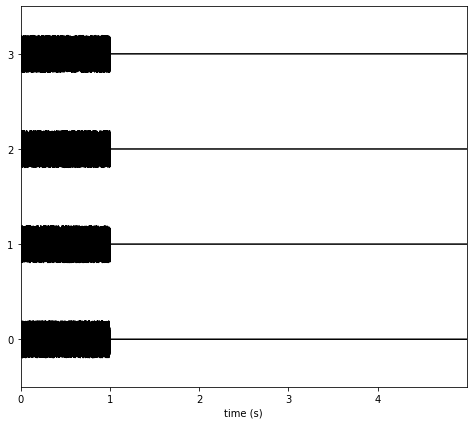

In [13]:

# Set nwbfile name
nwbfile_name = 'nwb_unit_egf.nwb'


# Specify source data
source_data = dict(
    AxonaLFPDataInterface=dict(filename=filename_egf),
    AxonaUnitRecordingExtractorInterface=dict(filename=filename),
    AxonaPositionDataInterface=dict(filename=filename),
)
print(json.dumps(source_data, indent=2))


# Initialize Converter
converter = HussainiUnitNWBConverter(source_data=source_data)


# Get metadata
metadata = converter.get_metadata()


# Export to NWB file
output_file = base_dir / nwbfile_name

converter.run_conversion(
    metadata=metadata,
    nwbfile_path=output_file,
    overwrite=True,
    save_to_file=True,
    conversion_options=None
)


# Check NWB file

fname = output_file
with NWBHDF5IO(fname, 'r') as io:
    nwbfile = io.read()
    print(nwbfile)
    

%matplotlib inline

io = NWBHDF5IO(output_file, mode='r')
nwb = io.read()

nwb2widget(nwb)

## Adding data to existing nwb files

Add `.pos` and `.eeg` data to `.bin` acquisition

__Note:__ We did not appropriately close the connection to the nwbfile earlier, and running the below code without doing so will result in an error. To avoid this, simply restart the notebook, evaluate the imports at the beginning and do not evaluate any of the above cells containing inspections of the nwbfiles with nwbwidgets.

In [5]:
# Set nwbfile name
nwbfile_name = 'nwb_bin.nwb'


# Specify source data for pos
source_data = dict(
    AxonaPositionDataInterface=dict(filename=filename),
)
print(json.dumps(source_data, indent=2))


# Initialize Converter
converter = HussainiNWBConverter(source_data=source_data)


# Get metadata
metadata = converter.get_metadata()


# Export to NWB file
output_file = base_dir / nwbfile_name

converter.run_conversion(
    metadata=metadata,
    nwbfile_path=output_file,
    overwrite=False,
    save_to_file=True,
    conversion_options=None
)



# Specify source data for eeg
source_data = dict(
    AxonaLFPDataInterface=dict(filename=filename_eeg),
)
print(json.dumps(source_data, indent=2))


# Initialize Converter
converter = HussainiNWBConverter(source_data=source_data)


# Get metadata
metadata = converter.get_metadata()


# Export to NWB file
output_file = base_dir / nwbfile_name

converter.run_conversion(
    metadata=metadata,
    nwbfile_path=output_file,
    overwrite=False,
    save_to_file=True,
    conversion_options=None
)


# Check NWB file

fname = output_file
with NWBHDF5IO(fname, 'r') as io:
    nwbfile = io.read()
    print(nwbfile)
    

%matplotlib inline

io = NWBHDF5IO(output_file, mode='r')
nwb = io.read()

nwb2widget(nwb)

{
  "AxonaPositionDataInterface": {
    "filename": "/mnt/c/tmp_data/catalystneuro/sample_bin_to_tint/axona_sample.set"
  }
}
Source data is valid!
Metadata is valid!


/home/sbuergers/spikeinterface/hussaini-test-pipeline/venv/lib/python3.8/site-packages/hdmf/common/table.py:447: UserWarning: An attribute 'name' already exists on DynamicTable 'electrodes' so this column cannot be accessed as an attribute, e.g., table.name; it can only be accessed using other methods, e.g., table['name'].
  warn(msg)
/home/sbuergers/spikeinterface/hussaini-test-pipeline/venv/lib/python3.8/site-packages/hdmf/build/objectmapper.py:256: DtypeConversionWarning: Spec 'SpatialSeries/timestamps': Value with data type int64 is being converted to data type float64 as specified.
  warnings.warn(full_warning_msg, DtypeConversionWarning)


NWB file saved at /mnt/c/tmp_data/catalystneuro/sample_bin_to_tint/nwb_bin.nwb!
{
  "AxonaLFPDataInterface": {
    "filename": "/mnt/c/tmp_data/catalystneuro/sample_bin_to_tint/axona_sample.eeg"
  }
}
Source data is valid!
Metadata is valid!


/home/sbuergers/spikeinterface/nwb-conversion-tools/nwb_conversion_tools/utils/spike_interface.py:302: UserWarning: cannot create electrodes for this recording as ids already exist
  warnings.warn("cannot create electrodes for this recording as ids already exist")
/home/sbuergers/spikeinterface/hussaini-test-pipeline/venv/lib/python3.8/site-packages/spikeextractors/extraction_tools.py:802: UserWarning: The recording extractor does not have unscaled traces. Returning scaled traces
  warnings.warn("The recording extractor does not have unscaled traces. Returning scaled traces")


NWB file saved at /mnt/c/tmp_data/catalystneuro/sample_bin_to_tint/nwb_bin.nwb!
root pynwb.file.NWBFile at 0x140220227874976
Fields:
  acquisition: {
    ElectricalSeries_raw <class 'pynwb.ecephys.ElectricalSeries'>
  }
  devices: {
    Axona <class 'pynwb.device.Device'>,
    Device_ecephys <class 'pynwb.device.Device'>
  }
  electrode_groups: {
    0 <class 'pynwb.ecephys.ElectrodeGroup'>,
    1 <class 'pynwb.ecephys.ElectrodeGroup'>,
    2 <class 'pynwb.ecephys.ElectrodeGroup'>,
    3 <class 'pynwb.ecephys.ElectrodeGroup'>
  }
  electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>
  experimenter: ['Abid']
  file_create_date: [datetime.datetime(2021, 8, 12, 9, 38, 46, 148199, tzinfo=tzoffset(None, 7200))]
  identifier: e07d5b2b-9b03-44c6-9d36-eeec419f4a87
  processing: {
    behavior <class 'pynwb.base.ProcessingModule'>,
    ecephys <class 'pynwb.base.ProcessingModule'>
  }
  session_start_time: 2020-10-04 11:07:07+02:00
  timestamps_reference_time: 2020-10-04 11:07:07+02